In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
district_df = pd.read_csv('../data/training_dataset.csv')
district_df.head()

,Unnamed: 0,year,SA2_CODE_2021,Median_tot_prsnl_inc_weekly,Median_rent_weekly,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket,population,criminal
0,0,2017,201011005,668.368108,305.773463,4.0,2.0,2.5,9.0633,13.92910,8.4240,31.58610,2.3978,6.326667,7492.0,160
1,1,2017,201011006,627.298015,277.484787,4.0,2.0,2.0,7.1170,6.88430,7.1593,23.80440,2.9129,7.095000,7489.0,825
2,2,2017,201011006,627.298015,277.484787,4.0,2.0,2.0,7.1170,6.88430,7.1593,23.80440,2.9129,7.095000,7489.0,1773
3,3,2017,201011006,627.298015,277.484787,4.0,2.0,2.0,7.1170,6.88430,7.1593,23.80440,2.9129,7.095000,7489.0,93
4,4,2017,201011008,532.350879,227.474550,3.0,1.0,1.0,1.9274,2.50055,1.3287,16.79745,0.7650,1.733333,14909.0,7377


In [4]:
district_df.isnull().sum()

Unnamed: 0                       0
year                             0
SA2_CODE_2021                    0
Median_tot_prsnl_inc_weekly    854
Median_rent_weekly               0
beds                             0
baths                            0
parkings                        35
Nearest_station                  0
Nearest_park                     0
Nearest_shop                     0
Nearest_hospital                 0
Nearest_school                   0
Nearest_supermarket              0
population                     343
criminal                         0
dtype: int64

In [5]:
district_df.dtypes

Unnamed: 0                       int64
year                             int64
SA2_CODE_2021                    int64
Median_tot_prsnl_inc_weekly    float64
Median_rent_weekly             float64
beds                           float64
baths                          float64
parkings                       float64
Nearest_station                float64
Nearest_park                   float64
Nearest_shop                   float64
Nearest_hospital               float64
Nearest_school                 float64
Nearest_supermarket            float64
population                     float64
criminal                         int64
dtype: object

In [59]:
# get the relevant features for prediction of price
income_df = district_df[['SA2_CODE_2021', 'year', 'Median_tot_prsnl_inc_weekly', 'population']]
income_df = income_df[income_df['year'] < 2022]
income_df.head()

,SA2_CODE_2021,year,Median_tot_prsnl_inc_weekly,population
0,201011005,2017,668.368108,7492.0
1,201011006,2017,627.298015,7489.0
2,201011006,2017,627.298015,7489.0
3,201011006,2017,627.298015,7489.0
4,201011008,2017,532.350879,14909.0


In [60]:
income_df.isnull().sum()

SA2_CODE_2021                    0
year                             0
Median_tot_prsnl_inc_weekly      0
population                     245
dtype: int64

In [61]:
# get the unique values for the code of SA2 region
SA2 = list(income_df['SA2_CODE_2021'].unique())

# Visualization of Relationship Between SA2 & Year and Median of Weekly Individual Income

Text(0.5, 1.0, 'Year and Weekly Individual Income')

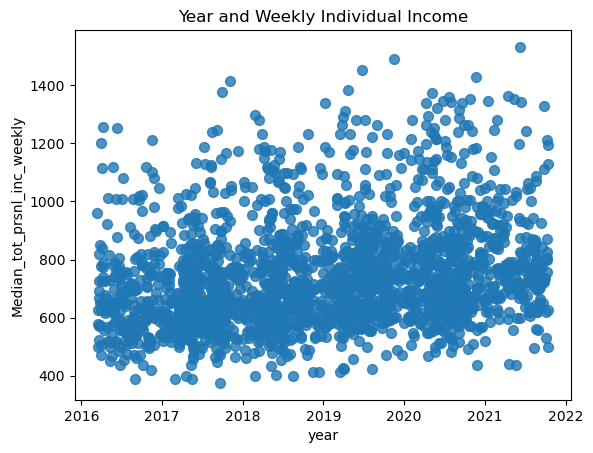

In [56]:
# plot to see the relationship between the year and individual income  
sns.regplot(data = income_df, x = 'year', y = 'Median_tot_prsnl_inc_weekly', fit_reg = False, 
            x_jitter = 0.8, y_jitter = 0.2,scatter_kws={"s": 50})
plt.title('Year and Weekly Individual Income')

These two plots shows some linear relationship between SA2 region and year with the weekly individual income respectively. This implies that a linear regression can be used to model the relationship.

In [62]:
# make the SA2 code as dummy variables
income = pd.get_dummies(income_df, columns=['SA2_CODE_2021'])
income

,year,Median_tot_prsnl_inc_weekly,population,SA2_CODE_2021_201011005,SA2_CODE_2021_201011006,SA2_CODE_2021_201011008,SA2_CODE_2021_201021009,SA2_CODE_2021_201021010,SA2_CODE_2021_201021011,SA2_CODE_2021_201021012,...,SA2_CODE_2021_217011422,SA2_CODE_2021_217031471,SA2_CODE_2021_217031472,SA2_CODE_2021_217031473,SA2_CODE_2021_217031474,SA2_CODE_2021_217031476,SA2_CODE_2021_217041477,SA2_CODE_2021_217041478,SA2_CODE_2021_217041479,SA2_CODE_2021_217041480
0,2017,668.368108,7492.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,627.298015,7489.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,627.298015,7489.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,627.298015,7489.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,532.350879,14909.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,2021,769.000000,6729.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2131,2021,758.000000,10139.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2132,2021,758.000000,10139.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2133,2021,760.000000,22921.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
# split the dataset into training and test set
train = income[income['year'] < 2021]
test = income[income['year'] == 2021] # year2021 data for testing

In [64]:
train

,year,Median_tot_prsnl_inc_weekly,population,SA2_CODE_2021_201011005,SA2_CODE_2021_201011006,SA2_CODE_2021_201011008,SA2_CODE_2021_201021009,SA2_CODE_2021_201021010,SA2_CODE_2021_201021011,SA2_CODE_2021_201021012,...,SA2_CODE_2021_217011422,SA2_CODE_2021_217031471,SA2_CODE_2021_217031472,SA2_CODE_2021_217031473,SA2_CODE_2021_217031474,SA2_CODE_2021_217031476,SA2_CODE_2021_217041477,SA2_CODE_2021_217041478,SA2_CODE_2021_217041479,SA2_CODE_2021_217041480
0,2017,668.368108,7492.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,627.298015,7489.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,627.298015,7489.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,627.298015,7489.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,532.350879,14909.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,2020,734.908324,6716.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1704,2020,727.431992,10029.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1705,2020,727.431992,10029.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1706,2020,730.847688,22627.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
test

,year,Median_tot_prsnl_inc_weekly,population,SA2_CODE_2021_201011005,SA2_CODE_2021_201011006,SA2_CODE_2021_201011008,SA2_CODE_2021_201021009,SA2_CODE_2021_201021010,SA2_CODE_2021_201021011,SA2_CODE_2021_201021012,...,SA2_CODE_2021_217011422,SA2_CODE_2021_217031471,SA2_CODE_2021_217031472,SA2_CODE_2021_217031473,SA2_CODE_2021_217031474,SA2_CODE_2021_217031476,SA2_CODE_2021_217041477,SA2_CODE_2021_217041478,SA2_CODE_2021_217041479,SA2_CODE_2021_217041480
1708,2021,805.0,8102.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1709,2021,775.0,8462.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1710,2021,775.0,8462.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1711,2021,775.0,8462.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1712,2021,642.0,15329.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,2021,769.0,6729.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2131,2021,758.0,10139.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2132,2021,758.0,10139.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2133,2021,760.0,22921.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
# split the dataset into the predictors(year and SA2 code) and income
X_train = train.drop('Median_tot_prsnl_inc_weekly', axis = 1)
X_test = test.drop('Median_tot_prsnl_inc_weekly', axis = 1)

y_train = train['Median_tot_prsnl_inc_weekly']
y_test = test['Median_tot_prsnl_inc_weekly']

# Modelling (Linear Regression)

In [67]:
# Modelling using linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [34]:
# test the accuracy of the linear regression model
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(lm.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.97


The accuracy is very high (0.97) which suggests that the fitted linear regression model is reliable to predict the weekly individual income from year 2022 to year 2026.

# Prediction of Median of Weekly Individual Income (Year 2022 to 2026)

In [50]:
# preprare dataframe containing year 2022 - 2026 and SA2 code for prediction
years = list(range(2022,2027))
year_list = [year for year in range(2022, 2027) for _ in range(len(SA2))]
SA2_list = SA2* len(years)
data = {'year':year_list, 'SA2_CODE_2021':SA2_list}
pred_income = pd.DataFrame(data = data)
pred_income = pred_income.merge(district_df[['year', 'SA2_CODE_2021', 'population']],
                                on = ['year', 'SA2_CODE_2021'], how = 'inner')
pred_income

,year,SA2_CODE_2021
0,2022,201011005
1,2022,201011006
2,2022,201011008
3,2022,201021009
4,2022,201021010
...,...,...
1540,2026,217031476
1541,2026,217041477
1542,2026,217041478
1543,2026,217041479


In [51]:
# make prediction of median of weekly individual income for each SA2 region from year 2022 to 2026 
X_pred= pd.get_dummies(pred_income, columns=['SA2_CODE_2021'])
result = lm.predict(X_pred)
pred_income['Median_tot_prsnl_inc_weekly'] = list(result)
pred_income

,year,SA2_CODE_2021,Median_tot_prsnl_inc_weekly
0,2022,201011005,826.875000
1,2022,201011006,789.500000
2,2022,201011008,682.406250
3,2022,201021009,804.781250
4,2022,201021010,677.468750
...,...,...,...
1540,2026,217031476,850.875000
1541,2026,217041477,923.750000
1542,2026,217041478,920.578125
1543,2026,217041479,925.867188


In [52]:
pred_income.to_csv('../data/curated/income_predict_22_26.csv')